In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt24 = "Analyze the rdf of the simulation of 1A3N solvated in water"
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-10
time: 23:04:46
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt24)

Thought: To analyze the radial distribution function (RDF) of the simulation of the protein 1A3N solvated in water, I need to ensure that I have the necessary trajectory and topology files. I will use the RDFTool to perform this analysis.

Action:
```
{
  "action": "RDFTool",
  "action_input": {
    "input": {
      "pdb_id": "1A3N"
    }
  }
}
```Error in Inputs in RDF tool:  Incorrect Inputs: Trajectory file ID ('trajectory_fileid')is required
To analyze the radial distribution function (RDF) of the simulation of the protein 1A3N solvated in water, I need to provide the correct trajectory file ID along with the topology file ID. Let's list the available paths to identify the correct file IDs.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To analyze the radial distribution function (RDF) of the simulation of the protein 1A3N solvated in water, I need to first download the necessary PDB file and then set up and run a short simulation 

2024-07-10 23:04:54.205 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed with the analysis of the radial distribution function (RDF) for the protein 1A3N solvated in water, I need to set up and run a short simulation to generate the required trajectory and topology files. After that, I can use the RDFTool to perform the analysis.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1A3N_230454",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 5000,
      "record_interval_steps": 100,
      "record_params

('The radial distribution function (RDF) analysis for the simulation of the protein 1A3N solvated in water has been successfully completed. The RDF plot has been generated and is available for review.\n\nFinal Answer: The RDF analysis for the simulation of the protein 1A3N solvated in water has been successfully completed. The RDF plot has been generated and saved as `fig0_231508`. This plot provides insights into the spatial distribution of water molecules around the protein, which is crucial for understanding solvation effects and protein-water interactions.',
 '5I7VMFV0')

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-10
time: 23:15:13
Files found in registry: 1A3N_230454: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_230454
 1A3N_230519: Cleaned File:  Removed Heterogens
 and Water Kept.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_230525: Initial positions for simulation sim0_230525
 sim0_230525: Basic Simulation of Protein 1A3N_230519
 rec0_230532: Simulation trajectory for protein 1A3N_230519 and simulation sim0_230525
 rec1_230532: Simulation state log for protein 1A3N_230519 and simulation sim0_230525
 rec2_230532: Simulation pdb frames for protein 1A3N_230519 and simulation sim0_230525
 fig0_231508: RDF plot for the trajectory file with id: rec0_230532


In [6]:
path_traj = registry.get_mapped_path("rec0_230532")
path_top = registry.get_mapped_path("top_sim0_230525")
assert os.path.exists(path_traj)
assert os.path.exists(path_top)
assert path_traj != path_top

assert path_traj.endswith(".dcd")
assert path_top.endswith(".pdb")

In [7]:
import mdtraj as md
traj = md.load(path_traj, top=path_top)
print(f"Simulation with :{traj.n_atoms} for {traj.n_frames} frames. Total time: {traj.time[-1]*0.002} ps")

Simulation with :24374 for 60 frames. Total time: 0.11800000000000001 ps


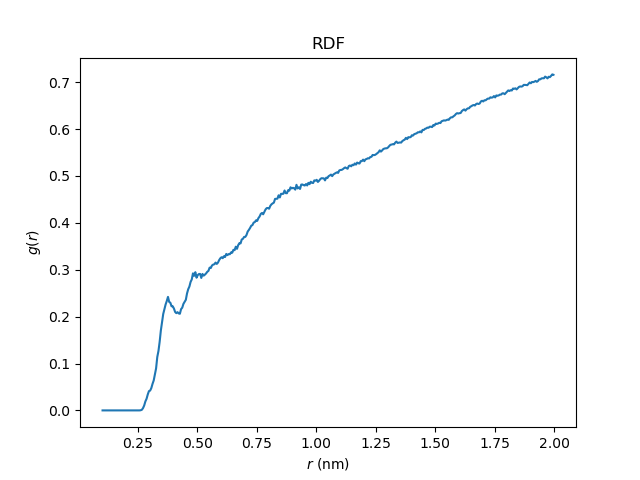

In [12]:
rdf_path = registry.get_mapped_path("fig0_231508")
#Disclaimer: Theres a bug in the rdf path saving. The image was created correctly, but the path was not saved correctly.
from IPython.display import Image
Image(filename=rdf_path)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Logic make sense ✅
### Correct Answer  ✅